# Lab 2
## Part 1 LIGO Antenna Patterns

In [1]:
%matplotlib widget

from lab_2.ligo_antenna import *

# Plot the antenna patterns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a spherical grid
r = 1
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2 * np.pi, 100)
theta, phi = np.meshgrid(theta, phi)

# Convert spherical coordinates to Cartesian coordinates for plotting
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

# Calculate the antenna patterns
f_plus_values = np.abs(f_plus(theta, phi))
f_cross_values = np.abs(f_cross(theta, phi))

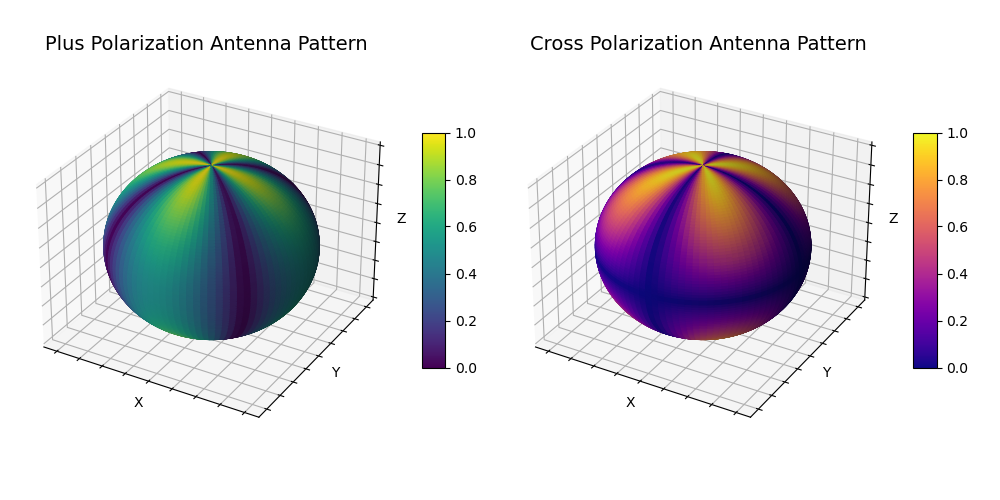

In [2]:
# Heatmap for plus and cross polarizations
from matplotlib.cm import ScalarMappable

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, z, facecolors=plt.cm.viridis(f_plus_values), rstride=1, cstride=1)
ax1.set_title('Plus Polarization Antenna Pattern', fontsize=14)
ax1.set_xlabel('X', labelpad=-10, fontsize=10)
ax1.set_ylabel('Y', labelpad=-10, fontsize=10)
ax1.set_zlabel('Z', labelpad=-10, fontsize=10)
plt.colorbar(ScalarMappable(cmap='viridis'), ax=ax1, shrink=0.5, aspect=10)
ax1.tick_params(label1On=False)

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x, y, z, facecolors=plt.cm.plasma(f_cross_values), rstride=1, cstride=1)
ax2.set_title('Cross Polarization Antenna Pattern', fontsize=14)
ax2.set_xlabel('X', labelpad=-10, fontsize=10)
ax2.set_ylabel('Y', labelpad=-10, fontsize=10)
ax2.set_zlabel('Z', labelpad=-10, fontsize=10)
plt.colorbar(ScalarMappable(cmap='plasma'), ax=ax2, shrink=0.5, aspect=10)
ax2.tick_params(label1On=False)

plt.tight_layout()
plt.show()

### Use tensors to derive the antenna patterns

We use the detector frame. In the frame, the detector arm unit vectors are $\hat{n}_X = (1,0,0)$ and $\hat{n}_Y=(0,1,0)$. The source direction vector for polar angles $(\theta, \phi)$ is $\hat{n} = (\sin\theta\cos\phi, \sin\theta\sin\phi, \cos\theta)$.

For polarization calculation, we need to derive the expressions of the unit vectors of the wave frame in the detector frame.
$$
\hat{x} \propto \hat{Z}\times \hat{n} = (0,0,1)\times (\sin\theta\cos\phi, \sin\theta\sin\phi, \cos\theta) = (-\sin\theta\sin\phi, \sin\theta\cos\phi, 0) \\
\hat{x} = (-\sin\phi, \cos\phi, 0) \\
\hat{y} \propto \hat{x}\times \hat{n} = (-\sin\phi, \cos\phi, 0) \times (\sin\theta\cos\phi, \sin\theta\sin\phi, \cos\theta) = (\cos\theta\cos\phi, \cos\theta\sin\phi, -\sin\theta) \\
\hat{y} = (\cos\theta\cos\phi, \cos\theta\sin\phi, -\sin\theta)
$$
The polarization tensors are then
$$
e_+ = \hat{x} \otimes \hat{x} - \hat{y} \otimes \hat{y} = \begin{pmatrix} \sin^2\phi-\cos^2\theta\cos^2\phi & -(1+\cos^2\theta)\sin\phi\cos\phi & \sin\theta\cos\theta\cos\phi \\ -(1+\cos^2\theta)\sin\phi\cos\phi & \cos^2\phi - \cos^2\theta\sin^2\phi & \sin\theta\cos\theta\sin\phi \\ \sin\theta\cos\theta\cos\phi & \sin\theta\cos\theta\sin\phi & -\sin^2\theta \end{pmatrix} \\
e_\times =  \hat{x} \otimes \hat{y} + \hat{y} \otimes \hat{x} = \begin{pmatrix} -\cos\theta\sin 2\phi & \cos\theta\cos 2\phi & \sin\theta\sin\phi \\ \cos\theta\cos 2\phi & \cos\theta\sin 2\phi & -\sin\theta\cos\phi \\ \sin\theta\sin\phi & -\sin\theta\cos\phi & 0 \end{pmatrix}
$$

In the detector frame, the detector tensor is then
$$
D = \frac{1}{2}(\hat{n}_X \otimes \hat{n}_X - \hat{n}_Y \otimes \hat{n}_Y) = \frac{1}{2}\begin{pmatrix}1 & 0 & 0 \\ 0 & -1 &0 \\ 0 & 0 & 0\end{pmatrix}.
$$
Hence we get the antenna patterns
$$
F_+ = D:e_+ = \frac{1}{2}(1+\cos^2\theta)(\sin^2\phi - \cos^2\phi) = -\frac{1}{2}(1+\cos^2\theta)\cos 2\phi \\
F_\times = D:e_\times = -\cos\theta\sin 2\phi
$$
The expressions differ from that in the lecture slides by a minus sign, and this can be fixed by rotating $\phi$ by $\pi/2$.

We can also numerically calculate the antenna patterns following the same procedure.

In [3]:
f_plus_numerical, f_cross_numerical = np.abs(antenna_patterns_numerical(theta, phi, psi=np.pi/6))

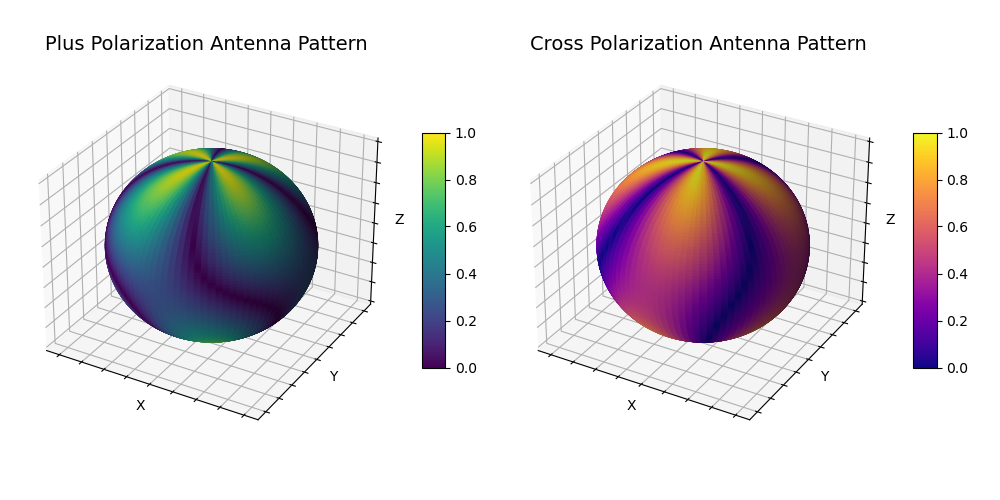

In [4]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, z, facecolors=plt.cm.viridis(f_plus_numerical), rstride=1, cstride=1)
ax1.set_title('Plus Polarization Antenna Pattern', fontsize=14)
ax1.set_xlabel('X', labelpad=-10, fontsize=10)
ax1.set_ylabel('Y', labelpad=-10, fontsize=10)
ax1.set_zlabel('Z', labelpad=-10, fontsize=10)
ax1.set_box_aspect((1, 1, 0.8))
plt.colorbar(ScalarMappable(cmap='viridis'), ax=ax1, shrink=0.5, aspect=10)
ax1.tick_params(label1On=False)

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x, y, z, facecolors=plt.cm.plasma(f_cross_numerical), rstride=1, cstride=1)
ax2.set_title('Cross Polarization Antenna Pattern', fontsize=14)
ax2.set_xlabel('X', labelpad=-10, fontsize=10)
ax2.set_ylabel('Y', labelpad=-10, fontsize=10)
ax2.set_zlabel('Z', labelpad=-10, fontsize=10)
ax2.set_box_aspect((1, 1, 0.8))
plt.colorbar(ScalarMappable(cmap='plasma'), ax=ax2, shrink=0.5, aspect=10)
ax2.tick_params(label1On=False)

plt.tight_layout()
plt.show()

### Introducing the polarization angle

For the antenna patterns with an arbitrary polarization angle $\psi$, we can directly perform a rotation in the wave frame. We introduce a new polarization basis
$$
\hat{p} = \cos\psi \hat{x} + \sin\psi \hat{y}, \\
\hat{q} = -\sin\psi \hat{x} + \cos\psi \hat{y}.
$$

The polarization tensors in this basis are
$$
e_+' = \hat{p}\otimes\hat{q} - \hat{q}\otimes\hat{q}, \\
e_\times' = \hat{p}\otimes\hat{q} + \hat{q}\otimes\hat{p}.
$$

Because
$$
\hat{p}\otimes\hat{p} = \cos^2\psi \hat{x}\otimes\hat{x} + \sin^2\psi \hat{y}\otimes\hat{y} + \sin\psi\cos\psi (\hat{x}\otimes\hat{y} + \hat{y}\otimes\hat{x}), \\
\hat{q}\otimes\hat{q} = \sin^2\psi \hat{x}\otimes\hat{x} + \cos^2\psi \hat{y}\otimes\hat{y} - \sin\psi\cos\psi (\hat{x}\otimes\hat{y} + \hat{y}\otimes\hat{x}),
$$
we find
$$
e_+' = \cos 2\psi (\hat{x}\otimes\hat{x} - \hat{y}\otimes\hat{y}) + \sin 2\psi(\hat{x}\otimes\hat{y} + \hat{y}\otimes\hat{x}) = \cos 2\psi e_+ + \sin 2\psi e_\times.
$$
Similarly,
$$
e_\times' = -\sin 2\psi e_+ + \cos 2\psi e_\times.
$$
These differ from the original polarization tensors by a rotation of angle $2\psi$.

Hence by tensor contraction we have the new antenna patterns
$$
F_+' = F_+ \cos 2\psi + F_\times \sin 2\psi, \\
F_\times' = -F_+ \sin 2\psi + F_\times \cos 2\psi.
$$

### Strain signal from a non-evolving binary

In [5]:
from lab_1.signal import *

# Generate a sample signal
A, B = 1, 0.5
f0 = 10  # Frequency in Hz
phi0 = np.pi / 4  # Phase in radians
sample_rate = 10*f0  # Sample rate in Hz
duration = 5  # Duration in seconds
t = np.arange(0, duration, 1/sample_rate)
h_plus = generate_sinusoidal(t, A, f0, 0)
h_cross = generate_sinusoidal(t, B, f0, phi0)

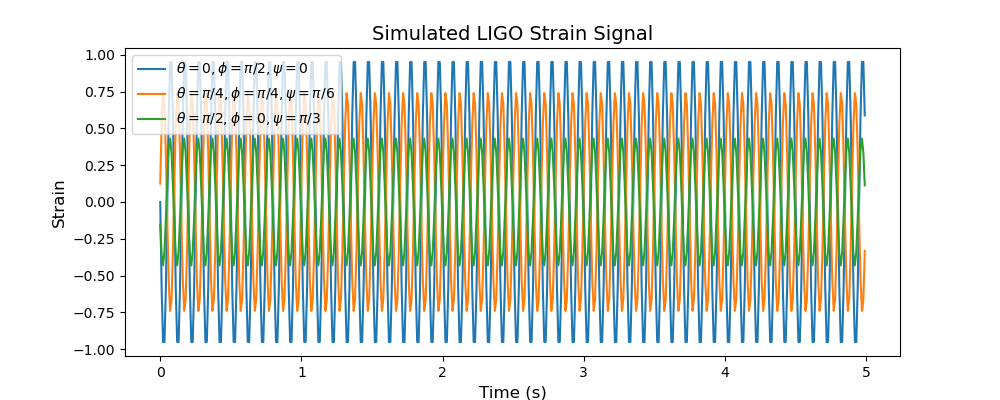

In [6]:
strain_1 = ligo_strain(h_plus, h_cross, theta=0, phi=np.pi/2, psi=0)
strain_2 = ligo_strain(h_plus, h_cross, theta=np.pi/4, phi=np.pi/4, psi=np.pi/6)
strain_3 = ligo_strain(h_plus, h_cross, theta=np.pi/2, phi=0, psi=np.pi/3)

plt.figure(figsize=(10, 4))
plt.plot(t, strain_1, label=r'$\theta=0, \phi=\pi/2, \psi=0$')
plt.plot(t, strain_2, label=r'$\theta=\pi/4, \phi=\pi/4, \psi=\pi/6$')
plt.plot(t, strain_3, label=r'$\theta=\pi/2, \phi=0, \psi=\pi/3$')
plt.title('Simulated LIGO Strain Signal', fontsize=14)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Strain', fontsize=12)
plt.legend()
plt.show()

## Part 2 LISA Antenna Patterns

### LISA Satellites Orbit

In [7]:
from lab_2.lisa_antenna import *

# Plot the LISA orbit
# L is 10 times the real distance between LISA satellites
L = 2.5e10  # Distance between satellites in meters
t = np.linspace(0, 2, 400)
orbit_1, orbit_2, orbit_3 = lisa_orbit(t, L)
earth = earth_orbit(t, np.pi/9)

In [8]:
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(8, 8))
plt.tight_layout()
ax = fig.add_subplot(111, projection='3d')
# 三条轨迹
line1, = ax.plot([], [], [], lw=1, color='blue')
line2, = ax.plot([], [], [], lw=1, color='red')
line3, = ax.plot([], [], [], lw=1, color='green')

# 三个当前点
pt1, = ax.plot([], [], [], 'o', ms=4, color='blue')
pt2, = ax.plot([], [], [], 'o', ms=4, color='red')
pt3, = ax.plot([], [], [], 'o', ms=4, color='green')
pt_earth = ax.plot([], [], [], 'o', ms=4, color='orange')

# 三条卫星之间的连线
link12, = ax.plot([], [], [], lw=2, color='gray')
link23, = ax.plot([], [], [], lw=2, color='gray')
link31, = ax.plot([], [], [], lw=2, color='gray')

# # 地球轨道
# earth_t = np.linspace(0, 2 * np.pi, 300)
# earth_x, earth_y, earth_z = a*np.cos(earth_t), a*np.sin(earth_t), np.zeros_like(earth_t)
# ax.plot(earth_x, earth_y, earth_z, color='orange', lw=1, label='Earth Orbit')


ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')

X1, Y1, Z1 = orbit_1
X2, Y2, Z2 = orbit_2
X3, Y3, Z3 = orbit_3
EX, EY, EZ = earth

N = len(t)
lim = 1.5e11
ax.set_xlim(-lim, lim); ax.set_ylim(-lim, lim); ax.set_zlim(-lim, lim)

ax.plot(EX, EY, EZ, color='orange', lw=1, label='Earth Orbit')

trail_len = 20

def update(i):
    k = max(0, i - trail_len)
    j = i + 1  # 让切片包含当前点 i

    # 更新轨迹（包含 i）
    line1.set_data(X1[k:j], Y1[k:j]); line1.set_3d_properties(Z1[k:j])
    line2.set_data(X2[k:j], Y2[k:j]); line2.set_3d_properties(Z2[k:j])
    line3.set_data(X3[k:j], Y3[k:j]); line3.set_3d_properties(Z3[k:j])

    # 更新当前点
    pt1.set_data([X1[i]], [Y1[i]]); pt1.set_3d_properties([Z1[i]])
    pt2.set_data([X2[i]], [Y2[i]]); pt2.set_3d_properties([Z2[i]])
    pt3.set_data([X3[i]], [Y3[i]]); pt3.set_3d_properties([Z3[i]])
    # pt_earth.set_data([EX[i]], [EY[i]]); pt_earth.set_3d_properties([EZ[i]])

    # 更新连线（两两连接）
    link12.set_data([X1[i], X2[i]], [Y1[i], Y2[i]])
    link12.set_3d_properties([Z1[i], Z2[i]])

    link23.set_data([X2[i], X3[i]], [Y2[i], Y3[i]])
    link23.set_3d_properties([Z2[i], Z3[i]])

    link31.set_data([X3[i], X1[i]], [Y3[i], Y1[i]])
    link31.set_3d_properties([Z3[i], Z1[i]])

    return line1, line2, line3, pt1, pt2, pt3, link12, link23, link31

ani = FuncAnimation(fig, update, frames=N, interval=30, blit=False)
ani.save("lisa_orbit.mp4", writer="ffmpeg", fps=30, dpi=150,
         extra_args=["-vcodec","libx264","-crf","23","-preset","medium"])
plt.close(fig)
# 在笔记本里播放
from IPython.display import Video
# from IPython.display import HTML
Video("lisa_orbit.mp4")
# HTML(ani.to_jshtml())

### LISA Antenna Patterns

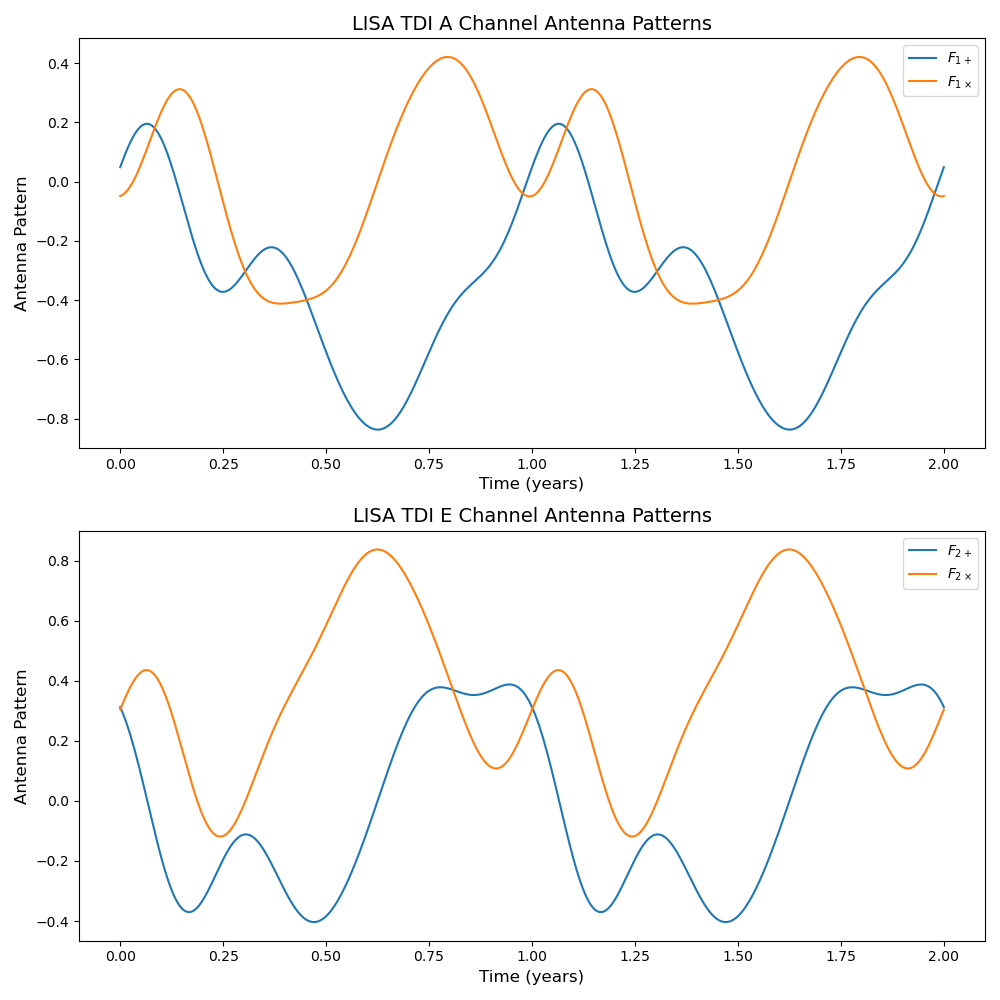

In [9]:
L = 2.5e9 # Distance between satellites in meters
lisa_positions = lisa_orbit(t, L)
F1p, F1x, F2p, F2x = lisa_antenna_patterns_numerical(lisa_positions, theta=np.pi/4, phi=np.pi/4, psi=np.pi/6)

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax1.plot(t, F1p, label=r'$F_{1+}$')
ax1.plot(t, F1x, label=r'$F_{1\times}$')
ax1.set_title('LISA TDI A Channel Antenna Patterns', fontsize=14)
ax1.set_xlabel('Time (years)', fontsize=12)
ax1.set_ylabel('Antenna Pattern', fontsize=12)
ax1.legend()

ax2 = fig.add_subplot(212)
ax2.plot(t, F2p, label=r'$F_{2+}$')
ax2.plot(t, F2x, label=r'$F_{2\times}$')
ax2.set_title('LISA TDI E Channel Antenna Patterns', fontsize=14)
ax2.set_xlabel('Time (years)', fontsize=12)
ax2.set_ylabel('Antenna Pattern', fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

### All-sky Animation

In [10]:
# all-sky meshgrid and time axis
Nθ, Nφ = 81, 161
θ = np.linspace(0, np.pi, Nθ)
φ = np.linspace(0, 2*np.pi, Nφ)
TH, PH = np.meshgrid(θ, φ, indexing='ij')     # 形状 (Nθ, Nφ)

T_steps  = 100
t_years  = np.linspace(0.0, 1.0, T_steps)
L        = 2.5e9                              # LISA 臂长（米）
psi      = 0.0                                # 或者 psi.shape = (T_steps,) 做随时间旋进

# Calculate the all-sky antenna patterns (Nθ,Nφ,T)
lisa_positions = lisa_orbit(t_years, L=L)
F1p, F1x, F2p, F2x = np.abs(lisa_antenna_patterns_numerical(lisa_positions, TH, PH, psi=psi))

# 把 (θ, φ) 映射到单位球（注意：θ 为极角 0..π, φ 为方位角 -π..π）
X = np.sin(TH) * np.cos(PH)
Y = np.sin(TH) * np.sin(PH)
Z = np.cos(TH)

# 先把四个 pattern 转为 "faces" 颜色 (Nθ-1, Nφ-1, T)
F1p_f = 0.25*(F1p[:-1,:-1,:] + F1p[1:,:-1,:] + F1p[:-1,1:,:] + F1p[1:,1:,:])
F1x_f = 0.25*(F1x[:-1,:-1,:] + F1x[1:,:-1,:] + F1x[:-1,1:,:] + F1x[1:,1:,:])
F2p_f = 0.25*(F2p[:-1,:-1,:] + F2p[1:,:-1,:] + F2p[:-1,1:,:] + F2p[1:,1:,:])
F2x_f = 0.25*(F2x[:-1,:-1,:] + F2x[1:,:-1,:] + F2x[:-1,1:,:] + F2x[1:,1:,:])

# 统一色标
from matplotlib import cm, colors
import matplotlib as mpl
vmax = np.max([np.abs(F1p_f).max(), np.abs(F1x_f).max(),
               np.abs(F2p_f).max(), np.abs(F2x_f).max()])
vmin = np.min([np.abs(F1p_f).min(), np.abs(F1x_f).min(),
               np.abs(F2p_f).min(), np.abs(F2x_f).min()])
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cmap = mpl.colormaps['RdBu_r']

def make_sphere(ax, F_faces0):
    # F_faces0: (Nθ-1, Nφ-1)
    facecolors_2d = cmap(norm(F_faces0))  # (Nθ-1, Nφ-1, 4) —— 正确的二维网格
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                           facecolors=facecolors_2d, linewidth=0,
                           antialiased=False, shade=False)
    ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
    ax.set_box_aspect((1,1,0.8))
    ax.view_init(elev=20, azim=30)
    return surf

fig = plt.figure(figsize=(16, 12))
ax11 = fig.add_subplot(2, 2, 1, projection='3d')
ax12 = fig.add_subplot(2, 2, 2, projection='3d')
ax21 = fig.add_subplot(2, 2, 3, projection='3d')
ax22 = fig.add_subplot(2, 2, 4, projection='3d')
plt.subplots_adjust(left=0.05, right=0.95, top=0.95,
                    bottom=0.05, wspace=0.05, hspace=0.05)

ax11.set_title(r'TDI A Channel $|F_{+}|$', fontsize=14)
ax12.set_title(r'TDI A Channel $|F_{\times}|$', fontsize=14)
ax21.set_title(r'TDI E Channel $|F_{+}|$', fontsize=14)
ax22.set_title(r'TDI E Channel $|F_{\times}|$', fontsize=14)

surf11 = make_sphere(ax11, F1p_f[..., 0])
surf12 = make_sphere(ax12, F1x_f[..., 0])
surf21 = make_sphere(ax21, F2p_f[..., 0])
surf22 = make_sphere(ax22, F2x_f[..., 0])

# 共享 colorbar
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=[ax11, ax12, ax21, ax22], shrink=0.85, pad=0.02)
cbar.set_label('Antenna pattern')

# 时间标注
time_text = fig.text(0.5, 0.98, f't = {t_years[0]:.3f} yr', ha='center', va='top', fontsize=20)

def update(k):
    surf11.set_facecolors(cmap(norm(F1p_f[..., k])).reshape(-1, 4))
    surf12.set_facecolors(cmap(norm(F1x_f[..., k])).reshape(-1, 4))
    surf21.set_facecolors(cmap(norm(F2p_f[..., k])).reshape(-1, 4))
    surf22.set_facecolors(cmap(norm(F2x_f[..., k])).reshape(-1, 4))
    time_text.set_text(f't = {t_years[k]:.3f} yr')
    return surf11, surf12, surf21, surf22, time_text

ani = FuncAnimation(fig, update, frames=F1p.shape[-1], interval=100, blit=False)
ani.save('lisa_fullsky_antenna.mp4', writer='ffmpeg', fps=15, dpi=150,
         extra_args=['-vcodec','libx264','-crf','20','-preset','medium'])
plt.close(fig)

# 在笔记本里播放
Video("lisa_fullsky_antenna.mp4")

### Strain signal from a non-evolving binary

In [11]:
# Generate a sample signal
A, B = 1, 0.5
f0 = 100  # Frequency in year^{-1}
phi0 = np.pi / 2  # Phase in radians
sample_rate = 10*f0  # Sample rate in year^{-1}
duration = 5 # Duration in years
theta_d = np.pi / 4  # Inclination angle in radians
phi_d = np.pi / 4  # Azimuthal angle in radians
t = np.arange(0, duration, 1/sample_rate)
h_plus = generate_sinusoidal(t, A, f0, 0)
h_cross = generate_sinusoidal(t, B, f0, phi0)

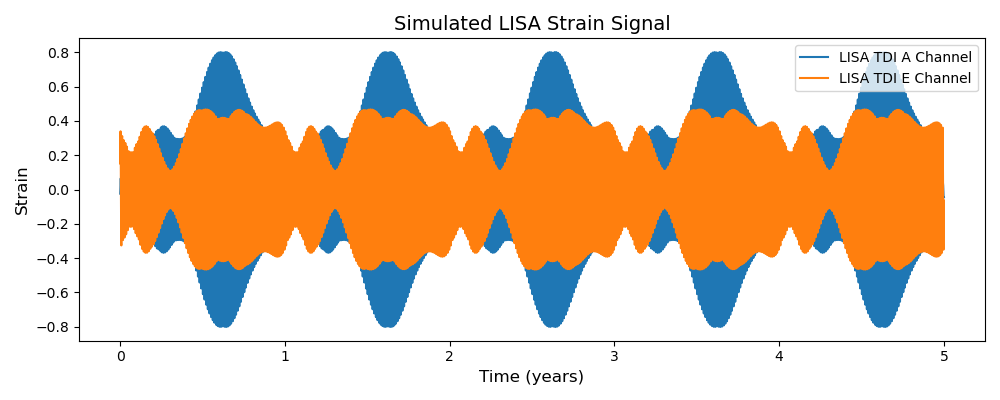

In [12]:
strain_1, strain_2 = lisa_strain(t, h_plus, h_cross, theta=theta_d, phi=phi_d, L=L, psi=np.pi/6)

plt.figure(figsize=(10, 4))
plt.plot(t, strain_1, label='LISA TDI A Channel')
plt.plot(t, strain_2, label='LISA TDI E Channel')
plt.title('Simulated LISA Strain Signal', fontsize=14)
plt.xlabel('Time (years)', fontsize=12)
plt.ylabel('Strain', fontsize=12)
plt.tight_layout()
plt.legend()
plt.show()

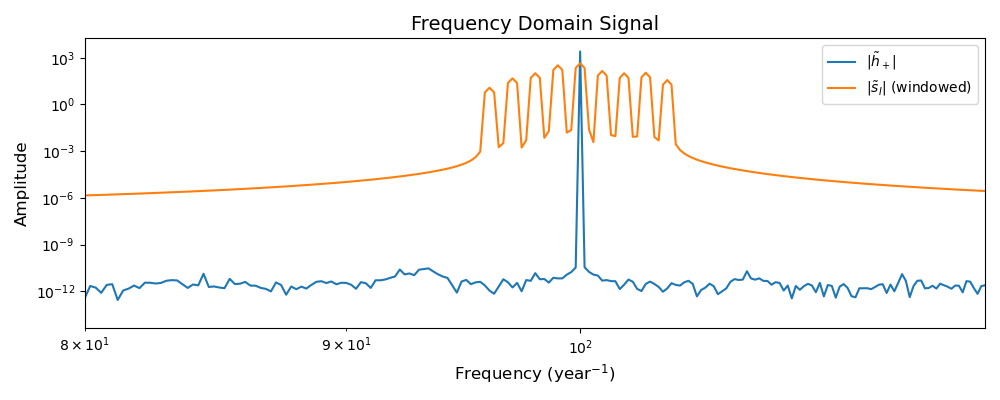

In [13]:
h_plus_tilde = np.fft.rfft(h_plus)
strain_1_tilde = np.fft.rfft(strain_1)
freqs = np.fft.rfftfreq(len(t), d=1/sample_rate)

# Apply a window function to reduce spectral leakage
h_plus_windowed = h_plus * np.hanning(len(h_plus))
h_plus_tilde_windowed = np.fft.rfft(h_plus_windowed)
strain_1_windowed = strain_1 * np.hanning(len(strain_1))
strain_1_tilde_windowed = np.fft.rfft(strain_1_windowed)

plt.figure(figsize=(10, 4))
plt.loglog(freqs, np.abs(h_plus_tilde), label=r'$|\tilde{h}_+|$')
plt.loglog(freqs, np.abs(strain_1_tilde_windowed), label=r'$|\tilde{s}_{I}|$ (windowed)')
plt.title('Frequency Domain Signal', fontsize=14)
plt.xlabel('Frequency (year$^{-1}$)', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.xlim(80, 120)
plt.legend()
plt.tight_layout()
plt.show()

### Doppler shifted strain

In [14]:
# A = 1
# B = A / 2
# f0 = 100 # Frequency in year^{-1}
# phi0 = np.pi / 2  # Phase in radians
# sample_rate = 10*f0  # Sample rate in year^{-1}
# duration = 2  # Duration in years
# t = np.arange(0, duration, 1/sample_rate)

strain_1, strain_2 = lisa_doppler_sinusoid_strain(t, A, B, f0, phi0, theta=np.pi/4, phi=np.pi/4, L=L, psi=0)

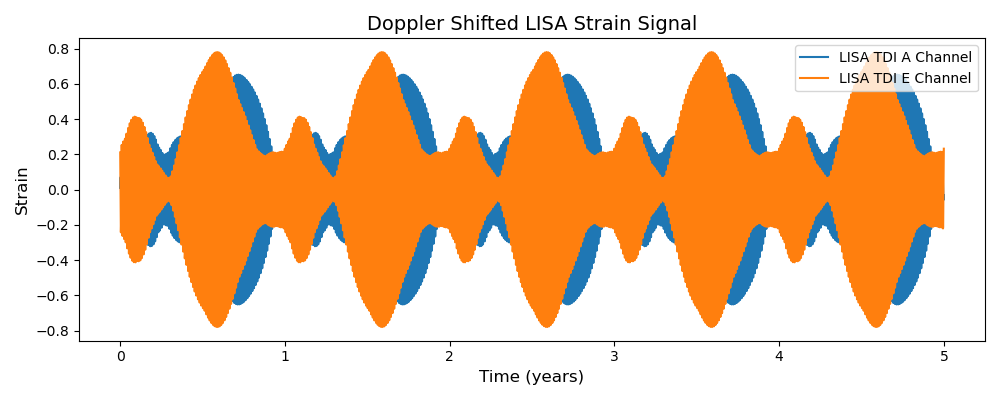

In [15]:
plt.figure(figsize=(10, 4))
plt.plot(t, strain_1, label='LISA TDI A Channel')
plt.plot(t, strain_2, label='LISA TDI E Channel')
plt.title('Doppler Shifted LISA Strain Signal', fontsize=14)
plt.xlabel('Time (years)', fontsize=12)
plt.ylabel('Strain', fontsize=12)
plt.tight_layout()
plt.legend()
plt.show()

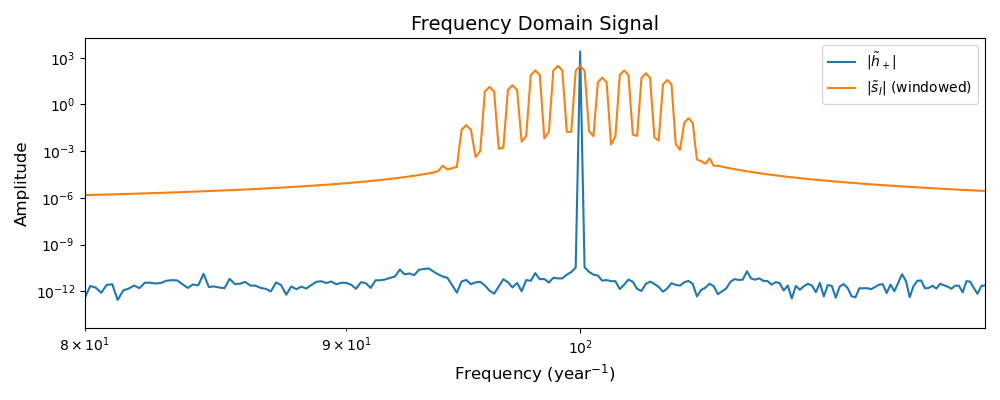

In [16]:
h_plus = generate_sinusoidal(t, A, f0, 0)
h_plus_tilde = np.fft.rfft(h_plus)
strain_1_tilde = np.fft.rfft(strain_1)
freqs = np.fft.rfftfreq(len(t), d=1/sample_rate)

# Apply a window function to reduce spectral leakage
h_plus_windowed = h_plus * np.hanning(len(h_plus))
h_plus_tilde_windowed = np.fft.rfft(h_plus_windowed)
strain_1_windowed = strain_1 * np.hanning(len(strain_1))
strain_1_tilde_windowed = np.fft.rfft(strain_1_windowed)

plt.figure(figsize=(10, 4))
plt.loglog(freqs, np.abs(h_plus_tilde), label=r'$|\tilde{h}_+|$')
plt.loglog(freqs, np.abs(strain_1_tilde_windowed), label=r'$|\tilde{s}_{I}|$ (windowed)')
plt.title('Frequency Domain Signal', fontsize=14)
plt.xlabel('Frequency (year$^{-1}$)', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.xlim(80, 120)
plt.legend()
plt.tight_layout()
plt.show()

### Effect of sky location 

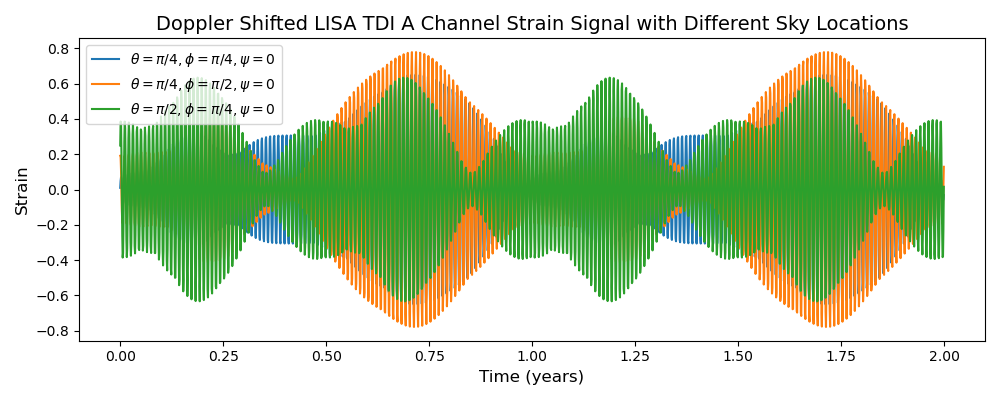

In [17]:
A, B = 1, 0.5
f0 = 100  # Frequency in year^{-1}
phi0 = np.pi / 2  # Phase in radians
sample_rate = 10*f0  # Sample rate in year^{-1}
duration = 2 # Duration in years
t = np.arange(0, duration, 1/sample_rate)

strain_1, _ = lisa_doppler_sinusoid_strain(t, A, B, f0, phi0, theta=np.pi/4, phi=np.pi/4, L=L, psi=0)
strain_2, _ = lisa_doppler_sinusoid_strain(t, A, B, f0, phi0, theta=np.pi/4, phi=np.pi/2, L=L, psi=0)
strain_3, _ = lisa_doppler_sinusoid_strain(t, A, B, f0, phi0, theta=np.pi/2, phi=np.pi/4, L=L, psi=0)

plt.figure(figsize=(10, 4))
plt.plot(t, strain_1, label=r'$\theta=\pi/4, \phi=\pi/4, \psi=0$')
plt.plot(t, strain_2, label=r'$\theta=\pi/4, \phi=\pi/2, \psi=0$')
plt.plot(t, strain_3, label=r'$\theta=\pi/2, \phi=\pi/4, \psi=0$')
plt.title('Doppler Shifted LISA TDI A Channel Strain Signal with Different Sky Locations', fontsize=14)
plt.xlabel('Time (years)', fontsize=12)
plt.ylabel('Strain', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

## Advanced: Tianqin Antenna Patterns

In [18]:
from lab_2.tianqin_antenna import *

RA = (8+6.3/60) * np.pi / 12  # Right Ascension in radians
DEC = 15.27 * np.pi / 180  # Declination in radians

ecl_lon, ecl_lat = equatorial_to_ecliptic(RA, DEC)

t = np.linspace(0, 1, 400)
L_Tianqin = 1e9  # Tianqin distance in meters, 10 times the real distance

tianqin_orb, earth_orb = tianqin_positions(L=L_Tianqin, t_years=t, ecl_lon=ecl_lon, ecl_lat=ecl_lat)
tianqin_1, tianqin_2, tianqin_3 = tianqin_orb

In [19]:
R = L_Tianqin / np.sqrt(3.0)
omega = np.sqrt(MU_EARTH / R**3)    # 地心引力近似
T_sat = 2.0 * np.pi / omega
T_sat / 86400

50.530814307058364

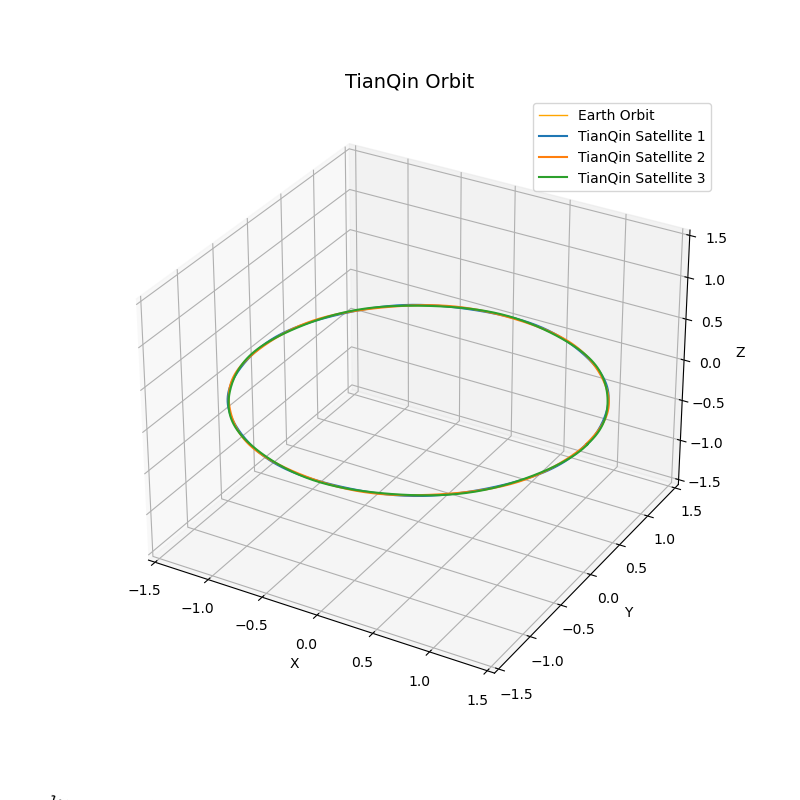

In [20]:
# Plot the TianQin orbit
fig = plt.figure(figsize=(8, 8))
plt.tight_layout()
ax = fig.add_subplot(111, projection='3d')
ax.plot(earth_orb[0], earth_orb[1], earth_orb[2], color='orange', lw=1, label='Earth Orbit')
ax.plot(tianqin_1[0], tianqin_1[1], tianqin_1[2], label='TianQin Satellite 1')
ax.plot(tianqin_2[0], tianqin_2[1], tianqin_2[2], label='TianQin Satellite 2')
ax.plot(tianqin_3[0], tianqin_3[1], tianqin_3[2], label='TianQin Satellite 3')
ax.set_xlim(-1.5e11, 1.5e11)
ax.set_ylim(-1.5e11, 1.5e11)
ax.set_zlim(-1.5e11, 1.5e11)
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
ax.set_title('TianQin Orbit', fontsize=14)
ax.legend()
plt.show()

In [21]:
from matplotlib.animation import FuncAnimation
fig = plt.figure(figsize=(8, 8))
plt.tight_layout()
ax = fig.add_subplot(111, projection='3d')
# 三条轨迹
line1, = ax.plot([], [], [], lw=1, color='blue')
line2, = ax.plot([], [], [], lw=1, color='red')
line3, = ax.plot([], [], [], lw=1, color='green')

# 三个当前点
pt1, = ax.plot([], [], [], 'o', ms=4, color='blue')
pt2, = ax.plot([], [], [], 'o', ms=4, color='red')
pt3, = ax.plot([], [], [], 'o', ms=4, color='green')
pt_earth, = ax.plot([], [], [], 'o', ms=4, color='black')

# 三条卫星之间的连线
link12, = ax.plot([], [], [], lw=2, color='gray')
link23, = ax.plot([], [], [], lw=2, color='gray')
link31, = ax.plot([], [], [], lw=2, color='gray')

# # 地球轨道
# earth_t = np.linspace(0, 2 * np.pi, 300)
# earth_x, earth_y, earth_z = a*np.cos(earth_t), a*np.sin(earth_t), np.zeros_like(earth_t)
# ax.plot(earth_x, earth_y, earth_z, color='orange', lw=1, label='Earth Orbit')


ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')

X1, Y1, Z1 = tianqin_1
X2, Y2, Z2 = tianqin_2
X3, Y3, Z3 = tianqin_3
EX, EY, EZ = earth_orb

N = len(t)
lim = 1.5e11
ax.set_xlim(-lim, lim); ax.set_ylim(-lim, lim); ax.set_zlim(-lim, lim)

ax.plot(EX, EY, EZ, color='orange', lw=1, label='Earth Orbit')

trail_len = 20
zoom_window = 2e9  # 放大窗口（米），越小越近
time_text = fig.text(0.5, 0.98, f't = {t[0]:.3f} yr', ha='center', va='top', fontsize=16)

def update(i):
    k = max(0, i - trail_len)
    j = i + 1  # 让切片包含当前点 i

    # ===== 动态调整坐标范围 =====
    cx = (X1[i] + X2[i] + X3[i]) / 3.0
    cy = (Y1[i] + Y2[i] + Y3[i]) / 3.0
    cz = (Z1[i] + Z2[i] + Z3[i]) / 3.0
    ax.set_xlim(cx - zoom_window, cx + zoom_window)
    ax.set_ylim(cy - zoom_window, cy + zoom_window)
    ax.set_zlim(cz - zoom_window, cz + zoom_window)

    # 更新轨迹
    line1.set_data(X1[k:j], Y1[k:j]); line1.set_3d_properties(Z1[k:j])
    line2.set_data(X2[k:j], Y2[k:j]); line2.set_3d_properties(Z2[k:j])
    line3.set_data(X3[k:j], Y3[k:j]); line3.set_3d_properties(Z3[k:j])

    # 更新当前点
    pt1.set_data([X1[i]], [Y1[i]]); pt1.set_3d_properties([Z1[i]])
    pt2.set_data([X2[i]], [Y2[i]]); pt2.set_3d_properties([Z2[i]])
    pt3.set_data([X3[i]], [Y3[i]]); pt3.set_3d_properties([Z3[i]])
    pt_earth.set_data([EX[i]], [EY[i]]); pt_earth.set_3d_properties([EZ[i]])

    # 更新连线（两两连接）
    link12.set_data([X1[i], X2[i]], [Y1[i], Y2[i]])
    link12.set_3d_properties([Z1[i], Z2[i]])

    link23.set_data([X2[i], X3[i]], [Y2[i], Y3[i]])
    link23.set_3d_properties([Z2[i], Z3[i]])

    link31.set_data([X3[i], X1[i]], [Y3[i], Y1[i]])
    link31.set_3d_properties([Z3[i], Z1[i]])
    # ===============================
    time_text.set_text(f't = {t[i]:.3f} yr')

    return line1, line2, line3, pt1, pt2, pt3, link12, link23, link31

ani = FuncAnimation(fig, update, frames=N, interval=30, blit=False)
ani.save("tianqin_orbit.mp4", writer="ffmpeg", fps=30, dpi=150,
         extra_args=["-vcodec","libx264","-crf","23","-preset","medium"])
plt.close(fig)
# 在笔记本里播放
from IPython.display import Video
# from IPython.display import HTML
Video("tianqin_orbit.mp4")
# HTML(ani.to_jshtml())

In [29]:
# all-sky meshgrid and time axis
Nθ, Nφ = 81, 161
θ = np.linspace(0, np.pi, Nθ)
φ = np.linspace(0, 2*np.pi, Nφ)
TH, PH = np.meshgrid(θ, φ, indexing='ij')     # 形状 (Nθ, Nφ)

T_steps   = 100
t_years   = np.linspace(0.0, 0.1, T_steps)
L_Tianqin = 1e8                                # Tianqin 臂长（米）
psi       = 0.0                                # 或者 psi.shape = (T_steps,) 做随时间旋进

# Calculate the all-sky antenna patterns (Nθ,Nφ,T)
F1p, F1x, F2p, F2x = np.abs(tianqin_antenna_patterns_numerical(L_Tianqin, t_years, TH, PH, ecl_lon=ecl_lon, ecl_lat=ecl_lat, psi=psi))

# 把 (θ, φ) 映射到单位球（注意：θ 为极角 0..π, φ 为方位角 -π..π）
X = np.sin(TH) * np.cos(PH)
Y = np.sin(TH) * np.sin(PH)
Z = np.cos(TH)

# 先把四个 pattern 转为 "faces" 颜色 (Nθ-1, Nφ-1, T)
F1p_f = 0.25*(F1p[:-1,:-1,:] + F1p[1:,:-1,:] + F1p[:-1,1:,:] + F1p[1:,1:,:])
F1x_f = 0.25*(F1x[:-1,:-1,:] + F1x[1:,:-1,:] + F1x[:-1,1:,:] + F1x[1:,1:,:])
F2p_f = 0.25*(F2p[:-1,:-1,:] + F2p[1:,:-1,:] + F2p[:-1,1:,:] + F2p[1:,1:,:])
F2x_f = 0.25*(F2x[:-1,:-1,:] + F2x[1:,:-1,:] + F2x[:-1,1:,:] + F2x[1:,1:,:])

# 统一色标
from matplotlib import cm, colors
import matplotlib as mpl
vmax = np.max([np.abs(F1p_f).max(), np.abs(F1x_f).max(),
               np.abs(F2p_f).max(), np.abs(F2x_f).max()])
vmin = np.min([np.abs(F1p_f).min(), np.abs(F1x_f).min(),
               np.abs(F2p_f).min(), np.abs(F2x_f).min()])
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cmap = mpl.colormaps['RdBu_r']

def make_sphere(ax, F_faces0):
    # F_faces0: (Nθ-1, Nφ-1)
    facecolors_2d = cmap(norm(F_faces0))  # (Nθ-1, Nφ-1, 4) —— 正确的二维网格
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                           facecolors=facecolors_2d, linewidth=0,
                           antialiased=False, shade=False)
    ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
    ax.set_box_aspect((1,1,0.8))
    ax.view_init(elev=20, azim=30)
    return surf

fig = plt.figure(figsize=(16, 12))
ax11 = fig.add_subplot(2, 2, 1, projection='3d')
ax12 = fig.add_subplot(2, 2, 2, projection='3d')
ax21 = fig.add_subplot(2, 2, 3, projection='3d')
ax22 = fig.add_subplot(2, 2, 4, projection='3d')
plt.subplots_adjust(left=0.05, right=0.95, top=0.95,
                    bottom=0.05, wspace=0.05, hspace=0.05)

ax11.set_title(r'TDI A Channel $|F_{+}|$', fontsize=14)
ax12.set_title(r'TDI A Channel $|F_{\times}|$', fontsize=14)
ax21.set_title(r'TDI E Channel $|F_{+}|$', fontsize=14)
ax22.set_title(r'TDI E Channel $|F_{\times}|$', fontsize=14)

surf11 = make_sphere(ax11, F1p_f[..., 0])
surf12 = make_sphere(ax12, F1x_f[..., 0])
surf21 = make_sphere(ax21, F2p_f[..., 0])
surf22 = make_sphere(ax22, F2x_f[..., 0])

# 共享 colorbar
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=[ax11, ax12, ax21, ax22], shrink=0.85, pad=0.02)
cbar.set_label('Antenna pattern')

# 时间标注
time_text = fig.text(0.5, 0.98, f't = {t_years[0]:.3f} yr', ha='center', va='top', fontsize=20)

def update(k):
    surf11.set_facecolors(cmap(norm(F1p_f[..., k])).reshape(-1, 4))
    surf12.set_facecolors(cmap(norm(F1x_f[..., k])).reshape(-1, 4))
    surf21.set_facecolors(cmap(norm(F2p_f[..., k])).reshape(-1, 4))
    surf22.set_facecolors(cmap(norm(F2x_f[..., k])).reshape(-1, 4))
    time_text.set_text(f't = {t_years[k]:.3f} yr')
    return surf11, surf12, surf21, surf22, time_text

ani = FuncAnimation(fig, update, frames=F1p.shape[-1], interval=100, blit=False)
ani.save('tianqin_fullsky_antenna.mp4', writer='ffmpeg', fps=15, dpi=150,
         extra_args=['-vcodec','libx264','-crf','20','-preset','medium'])
plt.close(fig)

# 在笔记本里播放
Video("tianqin_fullsky_antenna.mp4")

In [23]:
# from astropy.coordinates import SkyCoord

# SkyCoord(ra=RA, dec=DEC, unit='rad').transform_to('barycentrictrueecliptic')

In [24]:
# arm_1 = orbit_1 - orbit_2
# arm_2 = orbit_2 - orbit_3
# arm_3 = orbit_3 - orbit_1

# normal = np.cross(arm_1, arm_2, axis=0)
# normal /= np.linalg.norm(normal, axis=0)
# print("Normal vector of the triangle formed by the three satellites:", normal)

In [25]:
# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.plot(normal[0], normal[1], normal[2], 'o', ms=4, color='purple')
# ax.plot(0,0,0, 'o', ms=10, color='black')  # Center point

In [26]:
# arm_1 = arm_1 / np.linalg.norm(arm_1, axis=0)
# arm_2 = arm_2 / np.linalg.norm(arm_2, axis=0)
# arm_3 = arm_3 / np.linalg.norm(arm_3, axis=0)

# arm_1.shape

In [27]:
# # inclination of the normal vector respect to the xy-plane
# normal_x, normal_y, normal_z = normal
# inclination = np.arccos((normal_x**2+normal_y**2)**0.5)
# # inclination = np.arccos(normal[2])  # Angle with respect to the Z-axis
# # print("Inclination of the normal vector:", np.degrees(inclination), "degrees")
